# 葡萄酒分类！
<img src='images\ch13\ch13-08.png' width =500>

In [1]:
import pandas as pd

In [3]:
# 练习！
#https://archive.ics.uci.edu/ml/datasets/Wine
column_names  = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                 "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
                 "OD280/OD315 of diluted wines", "Proline"]
#data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names=column_names)
data = pd.read_csv('wine.data',names=column_names)

<img src='images\ch13\ch13-07.png' width =500>

In [4]:
data.tail()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
# 请用本堂课的知识，建立一个分类器
# 选择2-3个属性作为输入，进行分类识别

## 导入模块

In [6]:
import sklearn as sk
import IPython
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

## 需要分类的酒的等级

In [7]:
class_list=[]
data_dict={}
for name,data_by_group in data.groupby('class'):
    data_dict[name] = data_by_group
    class_list.append(name)
print("酒的等级有：",class_list)


酒的等级有： [1, 2, 3]


## 先观察每一个属性

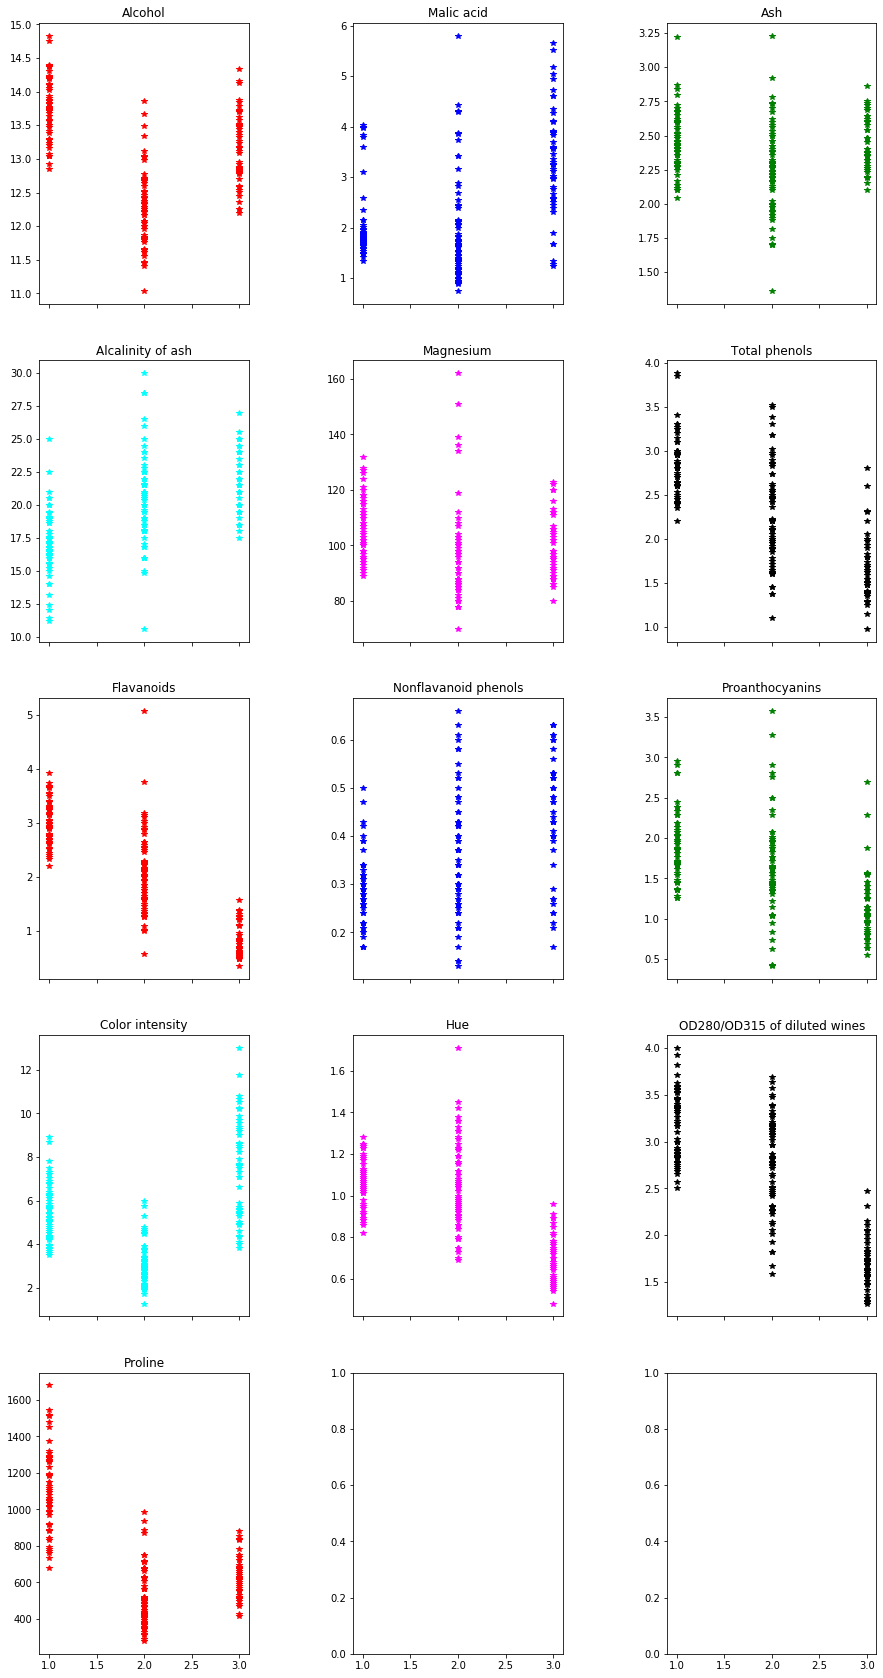

In [203]:
fig, axes= plt.subplots(5,3,sharex=True)
fig.set_size_inches(15,30)
plt.subplots_adjust(wspace=0.5, hspace=0.2)
features=["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                 "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
                 "OD280/OD315 of diluted wines", "Proline"]
colors=['red','blue','green','cyan','magenta','black']
for i in range(len(features)):
    j=i%6
    axes[i//3,i%3].set_title(features[i])
    plt.sca(axes[i//3,i%3])
    plt.plot(data['class'],data[features[i]],'*',color=colors[j])

## 结果分析
*从以上可以观察到*
* 酒的一类和三类较容易区分，可以通过属性 "Total phenols"，"Flavanoids"，"OD280/OD315 of diluted wines"即可很容易区分
* 酒的第二类通常介于一类和三类之间，难以区分，属性"Proline"较为适合区分第一类和第二类，属性 "Color intensity"较为适合区分第二类和第三类

In [204]:
X=np.array(data[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                 "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
                 "OD280/OD315 of diluted wines", "Proline"]])
y=np.array(data["class"])
#print (X_train.shape, y_train.shape)

## 采用三种属性分类："Flavanoids"，"Color intensity"和"Proline" 

### 标准化数据

In [205]:
scaler1 = StandardScaler().fit(X)
X1 = scaler1.transform(X)

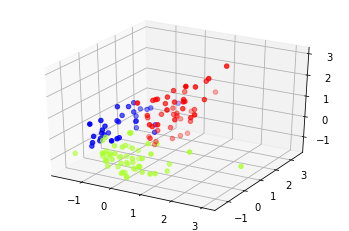

In [206]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.25, random_state=53)
X_train1=X_train1[:,6:13:3]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax1 = plt.axes(projection='3d')
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    px = X_train1[:, 0][y_train1 == i+1]
    py = X_train1[:, 1][y_train1 == i+1]
    pz = X_train1[:, 2][y_train1 == i+1]
    ax1.scatter3D(px, py,pz, c=colors[i])

### 创建对象 线性模型分类器 linear model classifier

In [207]:
clf1 = SGDClassifier()
clf1.fit(X_train1, y_train1) 
print (clf1.coef_)
print (clf1.intercept_)

[[  5.94202645   2.45115168  17.37475611]
 [  8.31195245 -15.51894554 -15.39017167]
 [-19.2529781   16.84958358   6.79140587]]
[ -2.56754138  -9.56906378 -17.93998341]


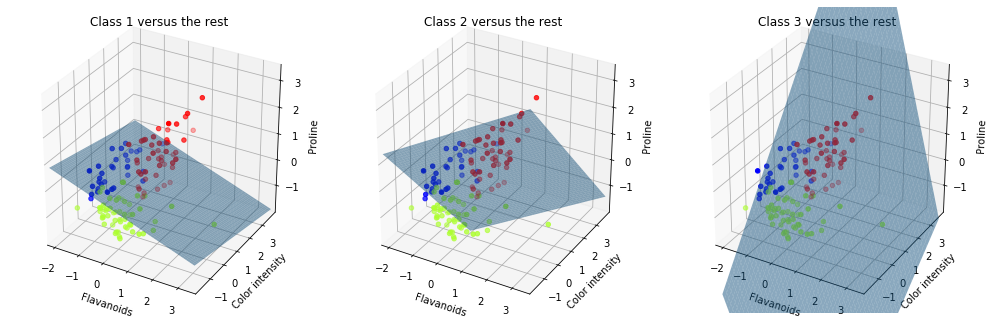

In [224]:
x_min, x_max = X_train1[:,0].min() - .5, X_train1[:,0].max() + .5 # 找出最大最小值，用于画图
y_min, y_max = X_train1[:,1].min() - .5, X_train1[:,1].max() + .5
z_min, z_max = X_train1[:,2].min() - .5, X_train1[:,2].max() + .5
fig = plt.figure(figsize=(15, 5), facecolor='w')
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9)
plt.subplots_adjust(wspace=0.1)
for i in [0,1,2]:  #按图循环
    axes[i] = fig.add_subplot(131+i,projection='3d')
    axes[i].set_title('Class ' + str(i+1) + ' versus the rest')
    axes[i].set_xlabel('Flavanoids')
    axes[i].set_ylabel('Color intensity')
    axes[i].set_zlabel('Proline')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_zlim(z_min, z_max)
    for j in range(len(colors)):
        px = X_train1[:, 0][y_train1 == j+1]
        py = X_train1[:, 1][y_train1 == j+1]
        pz = X_train1[:, 2][y_train1 == j+1]
        axes[i].scatter(px,py,pz, c=colors[j])
    x = np.linspace(x_min, x_max,1000)
    y = np.linspace(y_min, y_max,1000)
    X, Y = np.meshgrid(x, y)
    Z = (clf1.intercept_[i]-X*clf1.coef_[i,0]-Y*clf1.coef_[i,1])/clf1.coef_[i,2] 
    axes[i].plot_surface(X,Y,Z,alpha=0.5)
    plt.grid(True)

### 检验模型效果

In [211]:
# 根据模型得到的预测值
y_train_pred1 = clf1.predict(X_train1)
# 与人工值比较，并输出得分
train_score1 = metrics.accuracy_score(y_train1, y_train_pred1)
print("训练得分：",train_score1)
X_test1=X_test1[:,6:13:3]
# 预测
y_pred1 = clf1.predict(X_test1)
# 与人工值比较，并输出得分
test_score1 = metrics.accuracy_score(y_test1, y_pred1)
print("测试得分：",test_score1)

训练得分： 0.9624060150375939
测试得分： 0.9555555555555556


## 采用两种属性分类："Proline"和 "Flavanoids"

### 标准化数据

In [212]:
scaler2 = StandardScaler().fit(X)
X2 = scaler2.transform(X)

Text(0, 0.5, 'Proline')

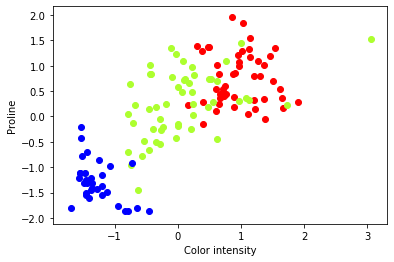

In [213]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.25, random_state=53)
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    px = X_train2[:, 6][y_train2 == i+1]
    py = X_train2[:, 11][y_train2 == i+1]
    plt.scatter(px, py, c=colors[i])
plt.xlabel("Color intensity")
plt.ylabel("Proline")

### 创建对象 线性模型分类器 linear model classifier

In [214]:
X_train2=X_train2[:,6:12:5]
from sklearn.linear_model import SGDClassifier
clf2 = SGDClassifier()
clf2.fit(X_train2, y_train2) 
print (clf2.coef_)
print (clf2.intercept_)

[[  7.25489361   5.66724729]
 [ -3.18494777   2.59082752]
 [-15.07053674 -10.22134262]]
[ -3.62441532   0.47445155 -26.72522736]


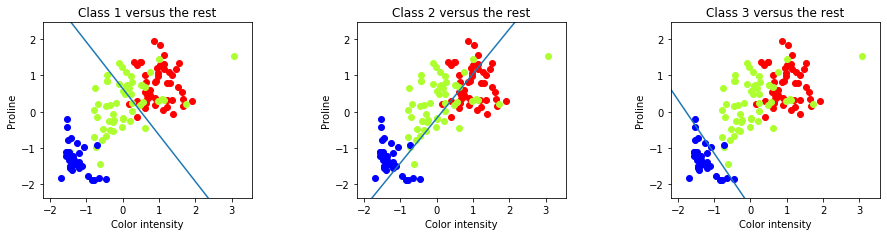

In [215]:
x_min, x_max = X_train2[:,0].min() - .5, X_train2[:,0].max() + .5 # 找出最大最小值，用于画图
y_min, y_max = X_train2[:,1].min() - .5, X_train2[:,1].max() + .5
xs = np.arange(x_min,x_max,0.5) #xs数据（绘制直线用）
fig, axes = plt.subplots(1,3)  #三个图
fig.set_size_inches(15,15)  #设置图大小
fig.subplots_adjust(wspace=0.5)
for i in [0,1,2]:  #按图循环
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i+1) + ' versus the rest')
    axes[i].set_xlabel('Color intensity')
    axes[i].set_ylabel('Proline')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    for j in range(len(colors)):
        px = X_train2[:,0][y_train2 == j+1]
        py = X_train2[:,1][y_train2 == j+1]
        plt.scatter(px, py, c=colors[j])
    ys = (-clf2.intercept_[i]-xs*clf2.coef_[i,0])/clf2.coef_[i,1]  #ys数据（绘制直线用）
    plt.plot(xs,ys);#,hold=True)

### 检验模型效果

In [216]:
# 根据模型得到的预测值
y_train_pred2 = clf2.predict(X_train2)

# 与人工值比较，并输出得分
train_score2 = metrics.accuracy_score(y_train2, y_train_pred2)
print("训练得分：",train_score2)
X_test2=X_test2[:,6:12:5]
# 预测
y_pred2 = clf2.predict(X_test2)
# 与人工值比较，并输出得分
test_score2 = metrics.accuracy_score(y_test2, y_pred2)
print("测试得分：",test_score2)

训练得分： 0.8120300751879699
测试得分： 0.7555555555555555


### 采用两种属性的分类器结果较差，远不如采用三种属性的分类器

## 本题中相比鸢尾花数据属性过多，难以猜测对分类最为有效的2-3个数据，故可先进行主成分分析

In [217]:
scaler3 = StandardScaler().fit(X)
X3 = scaler.transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=3, whiten=True, random_state=0)
X_pca = pca.fit_transform(X3) # 将训练 标准化，降维，归一化后的得到的组分1，2赋给x
X_train_pca, X_test_pca, y_train3, y_test3 = train_test_split(X_pca, y, test_size=0.25, random_state=53)
print('各方向方差：', pca.explained_variance_)
print('方差所占比例：', pca.explained_variance_ratio_)

各方向方差： [4.81952494 2.53790562 1.46006603]
方差所占比例： [0.36335611 0.19133909 0.11007805]


## 采用前两种方差较大的属性

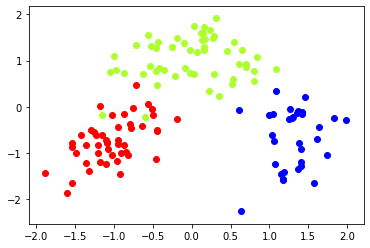

In [218]:
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    px = X_train_pca[:, 0][y_train == i+1]
    py = X_train_pca[:, 1][y_train == i+1]
    plt.scatter(px, py, c=colors[i])

### 由上图可以看出，三类酒很容易区分，预计结果不错

In [219]:
X_train_pca=X_train_pca[:,0:2]
clf3 = SGDClassifier()
clf3.fit(X_train_pca, y_train) 
print (clf3.coef_)
print (clf3.intercept_)

[[-13.174846    -5.63948114]
 [  0.62453539  12.05952031]
 [ 21.82473363 -11.31982416]]
[ -7.25694705  -1.35997103 -12.49658339]


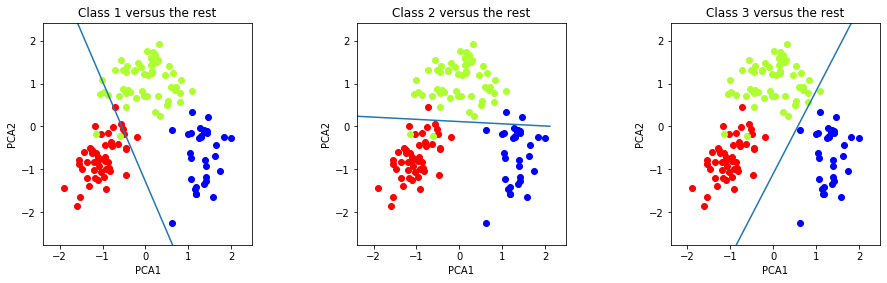

In [220]:
x_min, x_max = X_train_pca[:, 0].min() - .5, X_train_pca[:, 0].max() + .5 # 找出最大最小值，用于画图
y_min, y_max = X_train_pca[:, 1].min() - .5, X_train_pca[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5) #xs数据（绘制直线用）
fig, axes = plt.subplots(1,3)  #三个图
fig.set_size_inches(15,15)  #设置图大小
fig.subplots_adjust(wspace=0.5)
for i in [0,1,2]:  #按图循环
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i+1) + ' versus the rest')
    axes[i].set_xlabel('PCA1')
    axes[i].set_ylabel('PCA2')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    for j in range(len(colors)):
        px = X_train_pca[:, 0][y_train == j+1]
        py = X_train_pca[:, 1][y_train == j+1]
        plt.scatter(px, py, c=colors[j])
    ys = (-clf3.intercept_[i]-xs*clf3.coef_[i,0])/clf3.coef_[i,1]  #ys数据（绘制直线用）
    plt.plot(xs,ys);#,hold=True)

In [221]:
# 根据模型得到的预测值
y_train_pred3 = clf3.predict(X_train_pca)
# 与人工值比较，并输出得分
train_score3 = metrics.accuracy_score(y_train3, y_train_pred3)
print("训练得分：",train_score3)
X_test_pca=X_test_pca[:,0:2]
# 预测
y_pred3 = clf3.predict(X_test_pca)
# 与人工值比较，并输出得分
test_score3 = metrics.accuracy_score(y_test3, y_pred3)
print("测试得分：",test_score3)

训练得分： 0.9774436090225563
测试得分： 0.9333333333333333


## 经过主成分分析后的训练结果明显比采用两种属性的分类训练更好，
## 而且比采用三种属性的分类器略占优势